In [1]:
import os 
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
fetch_housing_data()
housing = load_housing_data()
# housing.head()

In [6]:
# housing.info()

In [7]:
# housing.describe()

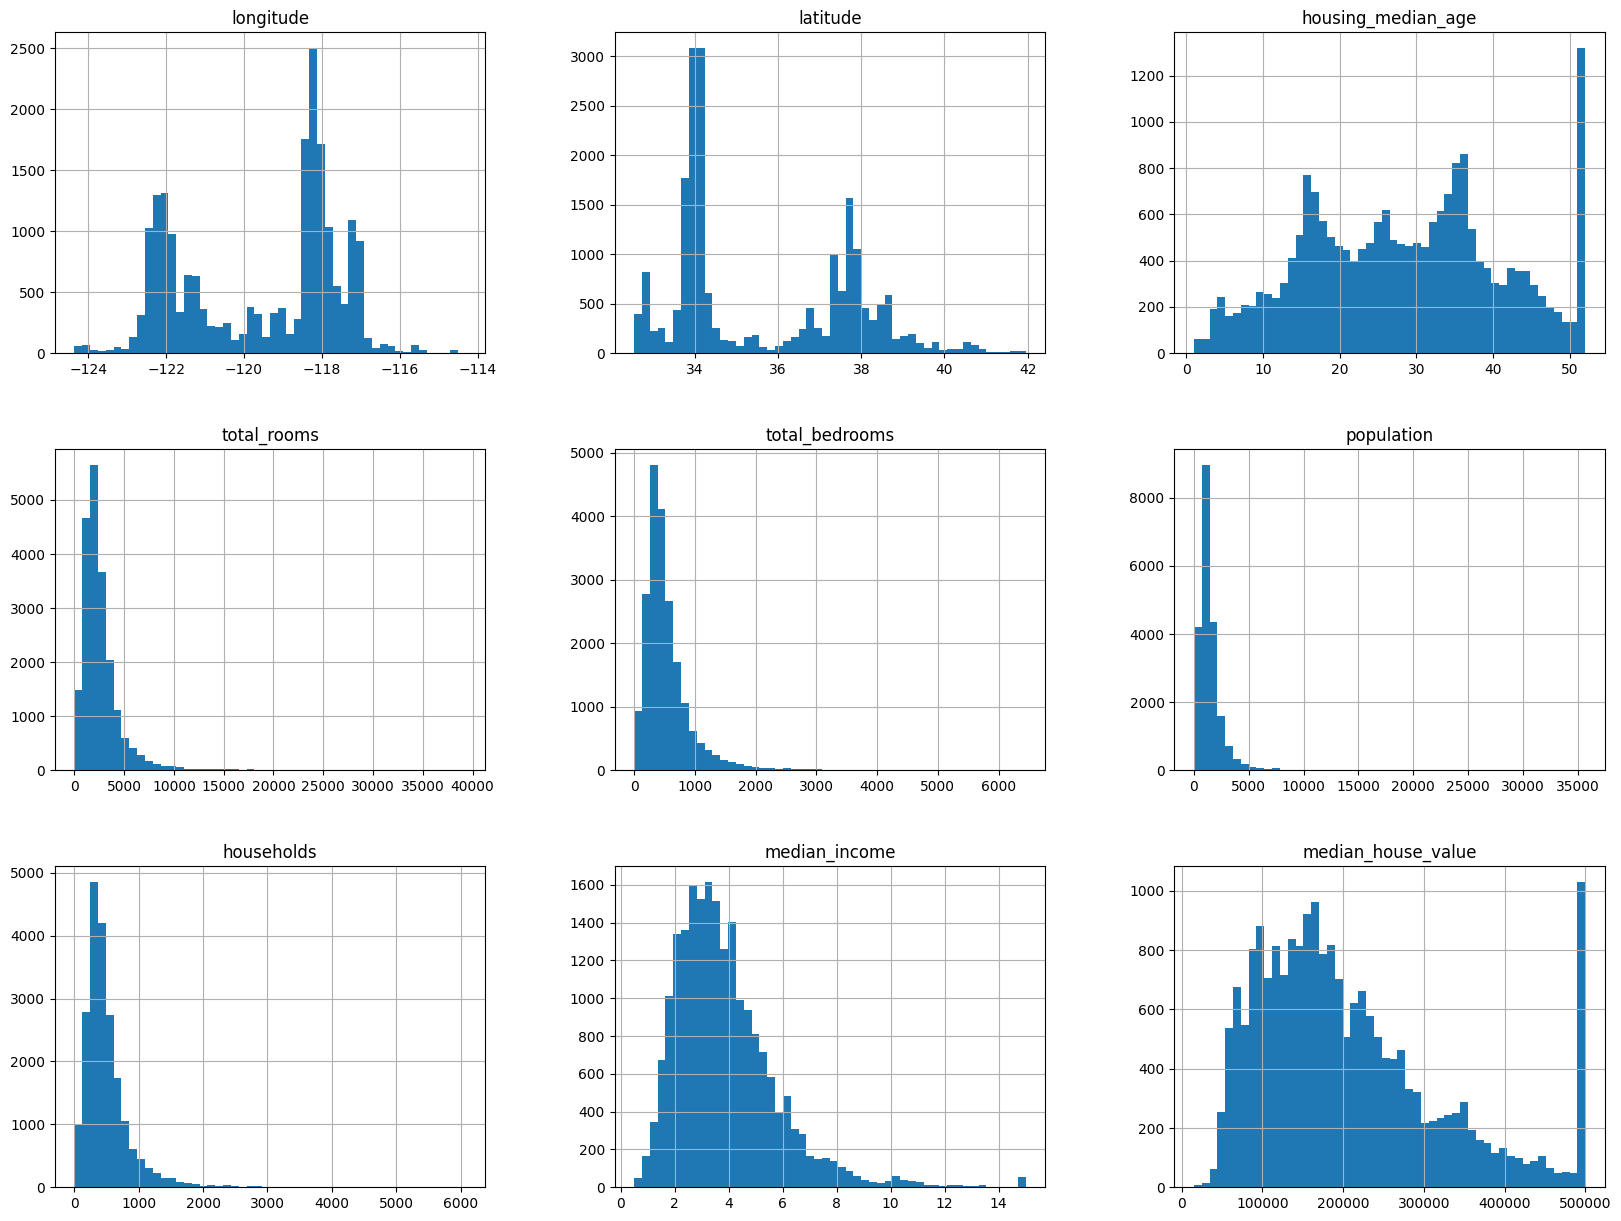

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [9]:
import numpy as np
# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)
# print(len(train_set), len(test_set))

In [11]:
# Garantindo a consistência do conjunto de testes.
# Robustez a: 
#   * Novas instâncias
#   * Re-execuções do algoritmo

# from zlib impor crc2
# def test_set_check(identifier, test_ratio):
#     return crc32(np.int64(identifier)) && 0xffffffff < test_ratio * 2^32
# def split_train_test_by_id(data, test_ratio,id_column):
#     ids = data[id_columns]
#     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

# housing_with_id = housing.reset_index()
# housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
# train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"id")


In [12]:
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

<Axes: >

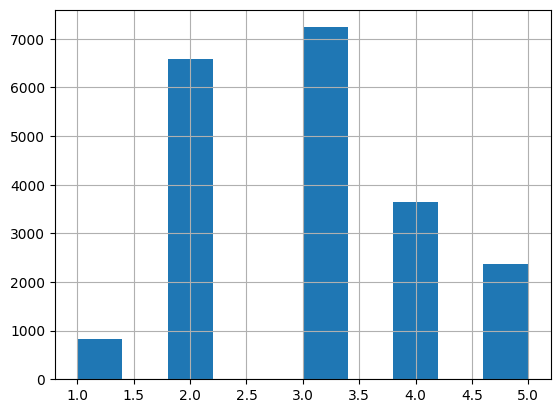

In [13]:
housing['income_cat'] = pd.cut(housing['median_income'],
                             bins = [0,1.5,3.0,4.5,6.,np.inf],
                             labels = [1,2,3,4,5])

housing["income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits= 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace=True)

In [17]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

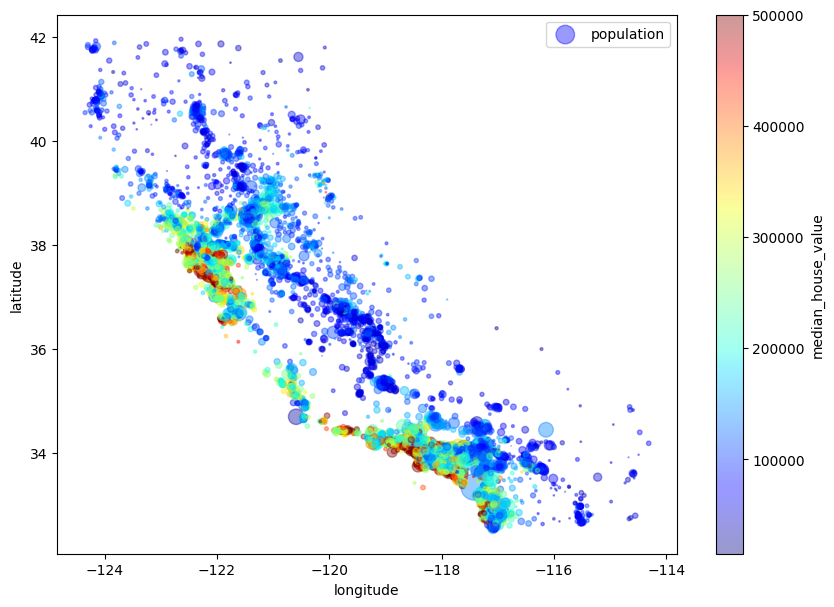

In [18]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude',alpha = 0.4,
            s = housing['population']/100 ,label = "population", figsize = (10,7),
            c = 'median_house_value', cmap = plt.get_cmap("jet"),colorbar = True)

In [19]:
import folium
from folium.plugins import HeatMap


# Extraindo as coordenadas do dataset
coordinates = housing[['latitude', 'longitude']]

# Cria um mapa centrado na média das latitudes e longitudes
mapa = folium.Map(location=[coordinates['latitude'].mean(), coordinates['longitude'].mean()], zoom_start=6)

# Adiciona o mapa de calor ao mapa
HeatMap(data=coordinates, radius=14).add_to(mapa)
mapa

In [20]:
# Extraindo as coordenadas e a população
coordinates = housing[['latitude', 'longitude', 'population']]

# Cria um mapa centrado na média das latitudes e longitudes
mapa = folium.Map(location=[coordinates['latitude'].mean(), coordinates['longitude'].mean()], zoom_start=6)

# Preparando os dados para o mapa de calor (latitude, longitude, peso)
heat_data = [[row['latitude'], row['longitude'], row['population']] for index, row in coordinates.iterrows()]

# Adiciona o mapa de calor ao mapa com os pesos de população
HeatMap(heat_data,radius = 14).add_to(mapa)

# Exibindo o mapa (isso irá exibir o mapa em um ambiente Jupyter Notebook, por exemplo)
mapa

In [21]:
# Extraindo as coordenadas e a população
coordinates = housing[['latitude', 'longitude', 'median_house_value']]

# Cria um mapa centrado na média das latitudes e longitudes
mapa = folium.Map(location=[coordinates['latitude'].mean(), coordinates['longitude'].mean()], zoom_start=6)

# Preparando os dados para o mapa de calor
# Peso = preço médio dos imóveis
heat_data = [[row['latitude'], row['longitude'], row['median_house_value']] for index, row in coordinates.iterrows()]

# Adiciona o mapa de calor ao mapa com os pesos baseados nos preços dos imóveis
HeatMap(heat_data,radius = 14).add_to(mapa)

# Exibindo o mapa
mapa

In [22]:
corr_matrix = housing.corr()

C:\Users\marco\AppData\Local\Temp\ipykernel_21888\2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [23]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

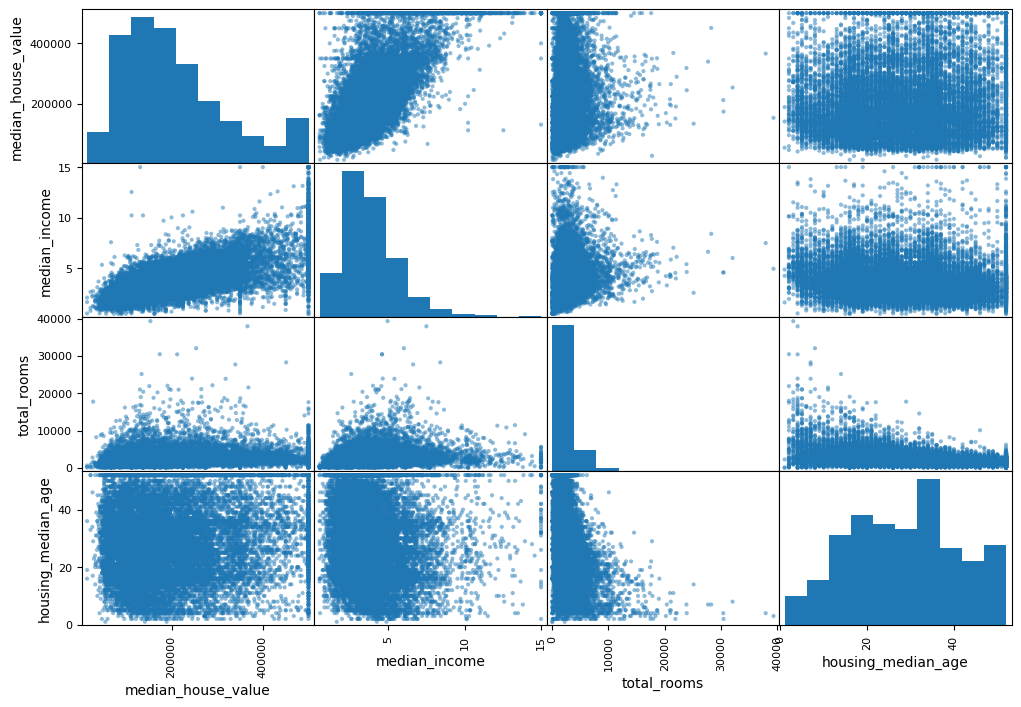

In [24]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

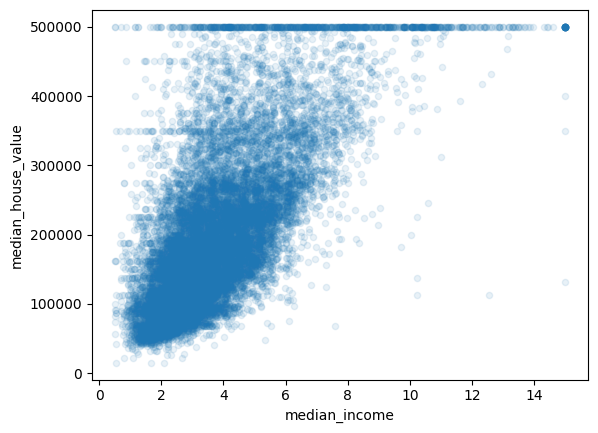

In [25]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)


In [26]:
housing['rooms_per_household'] = housing['total_rooms']/ housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/ housing['total_rooms']
housing['population_per_household'] = housing['population']/ housing['households']
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

C:\Users\marco\AppData\Local\Temp\ipykernel_21888\1700729618.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [27]:
# Iniciando a preparação dos dados para alimentar o algoritmo de ML

In [28]:
housing = strat_train_set.drop("median_house_value", axis =1)
housing_labels = strat_train_set['median_house_value'].copy()

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median');
housing_num = housing.drop('ocean_proximity', axis =1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [31]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [32]:
X = imputer.transform(housing_num)

In [33]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [34]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [35]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [36]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder= OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
#Criando Transformadores Customizados
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X, y= None):
        return self;
    def transform(self,X, y= None):
        rooms_per_household = X[:, rooms_ix]/ X[:,households_ix]
        population_per_household = X[:, population_ix]/ X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:,rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room]
        else: 
            return np.c_[X,rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num);

In [55]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)

In [42]:
# Modelo 1: Regressão Linear
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [46]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: " , scores.std())

In [47]:
display_scores(tree_rmse_scores)

Scores:  [72156.17929751 71619.26355574 68001.04348735 70118.16740015
 67490.55730914 77436.45445024 69648.83479843 73675.68159297
 69528.4547072  70636.37693236]
Mean:  71031.10135310762
Standard Deviation:  2766.0197837352125


In [48]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Deviation:  2880.3282098180666


In [49]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores:  [51561.44975655 49002.63803818 46971.76560191 52114.90718596
 47324.41461834 52269.76439934 52369.65214217 50046.91800017
 48746.06973193 54120.53134327]
Mean:  50452.8110817834
Standard Deviation:  2269.4641051800427


In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring= 'neg_mean_squared_error', 
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [51]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [52]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [53]:
cvres = grid_searchd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
    print(np.sqrt(-mean_score), params)

63726.10954382326 {'max_features': 2, 'n_estimators': 3}
55750.796383667024 {'max_features': 2, 'n_estimators': 10}
52577.101081234476 {'max_features': 2, 'n_estimators': 30}
60945.45718417057 {'max_features': 4, 'n_estimators': 3}
52717.60713506219 {'max_features': 4, 'n_estimators': 10}
50447.176970194596 {'max_features': 4, 'n_estimators': 30}
59228.97399776968 {'max_features': 6, 'n_estimators': 3}
51733.18317702907 {'max_features': 6, 'n_estimators': 10}
49845.557014811006 {'max_features': 6, 'n_estimators': 30}
58969.85922192721 {'max_features': 8, 'n_estimators': 3}
52095.48535986454 {'max_features': 8, 'n_estimators': 10}
50348.16719969206 {'max_features': 8, 'n_estimators': 30}
62399.784590512325 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54409.39970235581 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60597.31883855033 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52423.091891321375 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [54]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.16611950e-02, 6.51673626e-02, 4.21480252e-02, 1.88921754e-02,
       1.63824184e-02, 1.77868669e-02, 1.59457608e-02, 2.89090411e-01,
       6.50904435e-02, 1.07268373e-01, 8.91169792e-02, 9.00581955e-03,
       1.75651167e-01, 8.38131283e-05, 2.86324838e-03, 3.84594115e-03])

In [57]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.28909041123779217, 'median_income'),
 (0.17565116678211137, 'INLAND'),
 (0.10726837258344445, 'pop_per_hhold'),
 (0.0891169792305876, 'bedrooms_per_room'),
 (0.08166119504975218, 'longitude'),
 (0.06516736264942696, 'latitude'),
 (0.06509044351530854, 'rooms_per_hhold'),
 (0.04214802521037848, 'housing_median_age'),
 (0.018892175369509056, 'total_rooms'),
 (0.01778686688995648, 'population'),
 (0.01638241844190875, 'total_bedrooms'),
 (0.015945760834131645, 'households'),
 (0.009005819548586055, '<1H OCEAN'),
 (0.003845941149791523, 'NEAR OCEAN'),
 (0.0028632483790284723, 'NEAR BAY'),
 (8.381312828619884e-05, 'ISLAND')]

In [61]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47872.191732593354

In [63]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errorsared_errors)))

array([45860.80120333, 49802.41355148])